In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
file = 'https://raw.githubusercontent.com/gnapoles/data-mining-course/main/credit.csv'
data = pd.read_csv(file)
data.head()

,checking_account_status,credit_history,gender,age,job,savings_account_status,present_employment_since,other_debtors/guarantors,housing,foreign_worker,class
0,checking<0,not_paying_credits,male,adult,skilled_employee,no_savings,employed>=7y,no_debtors,own_house,foreign_worker,good_credit_risk
1,checking<200,paying_credits,female,young,skilled_employee,savings<100,employed<4y,no_debtors,own_house,foreign_worker,bad_credit_risk
2,no_checking,not_paying_credits,male,adult,unskilled_employee,savings<100,employed<7y,no_debtors,own_house,foreign_worker,good_credit_risk
3,checking<0,paying_credits,male,adult,skilled_employee,savings<100,employed<7y,guarantor,free_house,foreign_worker,good_credit_risk
4,checking<0,delay_paying_credits,male,adult,skilled_employee,savings<100,employed<4y,no_debtors,free_house,foreign_worker,bad_credit_risk


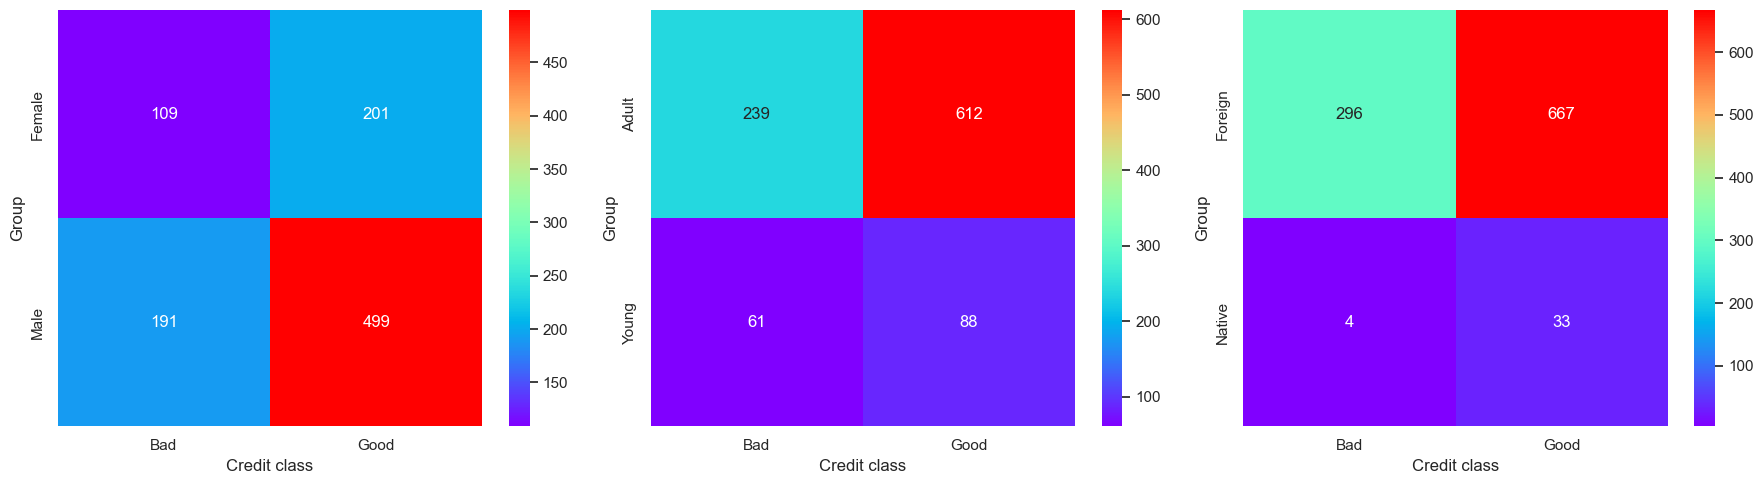

In [5]:
def plot_heatmap(data, groupby_col, ax):
    cf_comp = data.groupby([groupby_col, 'class']).size().unstack(fill_value=0)
    ax = sns.heatmap(cf_comp, annot = True, cmap='rainbow', ax=ax, fmt='d')
    ax.set_xticklabels(["Bad", "Good"])
    if groupby_col == "gender":
        ax.set_yticklabels(["Female", "Male"])
    elif groupby_col == "age":
        ax.set_yticklabels(["Adult", "Young"])
    elif groupby_col == "foreign_worker":
        ax.set_yticklabels(["Foreign", "Native"])    
    ax.set_xlabel("Credit class")
    ax.set_ylabel("Group")

                        
fig, axes = plt.subplots(1, 3, figsize = (18, 5))
groupby_cols = ['gender', 'age', 'foreign_worker']
                        
for i, groupby_col in enumerate(groupby_cols):
    plot_heatmap(data, groupby_col, axes[i])
                        
plt.tight_layout()
plt.show()

In [6]:
#process dataset to use apriori algorithm
processed = data.to_numpy().tolist()
processed = [[str(i) for i in transaction] for transaction in processed]

In [7]:
from apyori import apriori

In [21]:
results = apriori(processed, min_support=0.5, min_confidence = 0.4)

In [22]:
result_list = list(results)

In [23]:
#extract rules
rules = []
for i in result_list:
    for ordered_stat in i.ordered_statistics:
        if ordered_stat.items_base:
            rule = {
                'base' : ordered_stat.items_base,
                'add' : ordered_stat.items_add,
                'support' : i.support,
                'confidence': ordered_stat.confidence,
                'lift' : ordered_stat.lift
            }
            rules.append(rule)

In [24]:
rules

[{'base': frozenset({'adult'}),
  'add': frozenset({'foreign_worker'}),
  'support': 0.817,
  'confidence': 0.9600470035252644,
  'lift': 0.9969335446783639},
 {'base': frozenset({'foreign_worker'}),
  'add': frozenset({'adult'}),
  'support': 0.817,
  'confidence': 0.8483904465212876,
  'lift': 0.9969335446783638},
 {'base': frozenset({'adult'}),
  'add': frozenset({'good_credit_risk'}),
  'support': 0.612,
  'confidence': 0.7191539365452408,
  'lift': 1.0273627664932012},
 {'base': frozenset({'good_credit_risk'}),
  'add': frozenset({'adult'}),
  'support': 0.612,
  'confidence': 0.8742857142857143,
  'lift': 1.0273627664932015},
 {'base': frozenset({'adult'}),
  'add': frozenset({'male'}),
  'support': 0.625,
  'confidence': 0.7344300822561692,
  'lift': 1.0643914235596657},
 {'base': frozenset({'male'}),
  'add': frozenset({'adult'}),
  'support': 0.625,
  'confidence': 0.9057971014492754,
  'lift': 1.0643914235596657},
 {'base': frozenset({'adult'}),
  'add': frozenset({'no_debtor

In [25]:
for rule in rules:
    base = ', '.join(map(str, rule['base']))
    add = ', '.join(map(str, rule['add']))
    print(f"Rule: {base} -> {add}")
    print(f"Support: {rule['support']}")
    print(f"Confidence: {rule['confidence']}")
    print(f"Lift: {rule['lift']}")
    print("")


Rule: adult -> foreign_worker
Support: 0.817
Confidence: 0.9600470035252644
Lift: 0.9969335446783639

Rule: foreign_worker -> adult
Support: 0.817
Confidence: 0.8483904465212876
Lift: 0.9969335446783638

Rule: adult -> good_credit_risk
Support: 0.612
Confidence: 0.7191539365452408
Lift: 1.0273627664932012

Rule: good_credit_risk -> adult
Support: 0.612
Confidence: 0.8742857142857143
Lift: 1.0273627664932015

Rule: adult -> male
Support: 0.625
Confidence: 0.7344300822561692
Lift: 1.0643914235596657

Rule: male -> adult
Support: 0.625
Confidence: 0.9057971014492754
Lift: 1.0643914235596657

Rule: adult -> no_debtors
Support: 0.775
Confidence: 0.9106933019976499
Lift: 1.0040719977923371

Rule: no_debtors -> adult
Support: 0.775
Confidence: 0.8544652701212789
Lift: 1.0040719977923371

Rule: adult -> own_house
Support: 0.638
Confidence: 0.7497062279670975
Lift: 1.0514813856481031

Rule: own_house -> adult
Support: 0.638
Confidence: 0.8948106591865358
Lift: 1.0514813856481031

Rule: adult ->